In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import re
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding, Bidirectional, Input, Concatenate, TimeDistributed
from tensorflow.keras.utils import plot_model

In [ ]:
X_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/text_seq_data/word_seq_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/text_seq_data/word_seq_test.csv')
X_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/text_seq_data/word_seq_valid.csv')

y_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/label_seq_data/train_label.csv')
y_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/label_seq_data/test_label.csv')
y_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/label_seq_data/valid_label.csv')

vocab_size = int(np.loadtxt('/content/drive/MyDrive/ML_Project/data/liar_dataset/vocab_size_text.txt'))

In [ ]:
print(vocab_size)

14957


In [ ]:
X_train.shape, X_test.shape, X_valid.shape

((9465, 50), (1167, 50), (1183, 50))

# Multiclass

In [ ]:
abs_multiclass = dict()
abs_multiclass[-3] = 0
abs_multiclass[-2]=1
abs_multiclass[-1]=2
abs_multiclass[1]=3
abs_multiclass[2]=4
abs_multiclass[3]=5

In [ ]:
y_train = y_train.replace({'label': abs_multiclass})
y_test = y_test.replace({'label': abs_multiclass})
y_valid = y_valid.replace({'label': abs_multiclass})

## Text only

### LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=50, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=6, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 50, 4)             59828     
                                                                 
 dropout_27 (Dropout)        (None, 50, 4)             0         
                                                                 
 lstm_9 (LSTM)               (None, 4)                 144       
                                                                 
 dropout_28 (Dropout)        (None, 4)                 0         
                                                                 
 dense_18 (Dense)            (None, 100)               500       
                                                                 
 dropout_29 (Dropout)        (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 6)                

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
296/296 [==============================] - 9s 23ms/step - loss: 1.3096 - accuracy: 0.3782 - val_loss: 2.2378 - val_accuracy: 0.2392
Epoch 2/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2883 - accuracy: 0.3993 - val_loss: 2.3373 - val_accuracy: 0.2232
Epoch 3/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2667 - accuracy: 0.4195 - val_loss: 2.3614 - val_accuracy: 0.2426
Epoch 4/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2518 - accuracy: 0.4186 - val_loss: 2.4972 - val_accuracy: 0.2215
Epoch 5/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2300 - accuracy: 0.4338 - val_loss: 2.4706 - val_accuracy: 0.2071
Epoch 6/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2238 - accuracy: 0.4449 - val_loss: 2.4891 - val_accuracy: 0.2367
Epoch 7/10
296/296 [==============================] - 6s 21ms/step - loss: 1.2017 - accuracy: 0.4451 - val_loss: 2.5362 - val_accuracy: 0.2342

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.37      0.08      0.14        83
           1       0.24      0.41      0.30       222
           2       0.18      0.21      0.19       195
           3       0.22      0.35      0.27       246
           4       0.17      0.13      0.15       222
           5       1.00      0.00      0.00       199

    accuracy                           0.21      1167
   macro avg       0.36      0.19      0.17      1167
weighted avg       0.35      0.21      0.18      1167



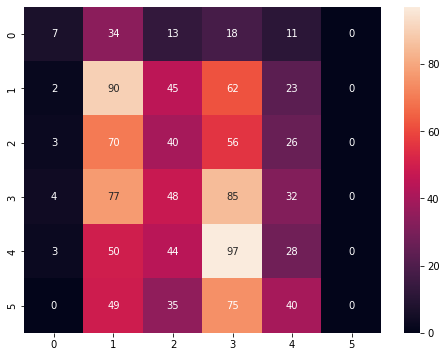

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- Bi-LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=50, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=6, activation='sigmoid'))

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 50, 4)             59828     
                                                                 
 dropout_36 (Dropout)        (None, 50, 4)             0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 8)                288       
 nal)                                                            
                                                                 
 dropout_37 (Dropout)        (None, 8)                 0         
                                                                 
 dense_24 (Dense)            (None, 100)               900       
                                                                 
 dropout_38 (Dropout)        (None, 100)               0         
                                                     

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
296/296 [==============================] - 13s 34ms/step - loss: 1.7619 - accuracy: 0.1962 - val_loss: 1.7602 - val_accuracy: 0.1970
Epoch 2/10
296/296 [==============================] - 9s 30ms/step - loss: 1.7464 - accuracy: 0.2226 - val_loss: 1.7296 - val_accuracy: 0.2316
Epoch 3/10
296/296 [==============================] - 9s 30ms/step - loss: 1.6876 - accuracy: 0.2729 - val_loss: 1.7247 - val_accuracy: 0.2587
Epoch 4/10
296/296 [==============================] - 9s 31ms/step - loss: 1.6098 - accuracy: 0.3111 - val_loss: 1.7670 - val_accuracy: 0.2477
Epoch 5/10
296/296 [==============================] - 9s 30ms/step - loss: 1.5361 - accuracy: 0.3344 - val_loss: 1.8346 - val_accuracy: 0.2409
Epoch 6/10
296/296 [==============================] - 9s 30ms/step - loss: 1.4750 - accuracy: 0.3506 - val_loss: 1.8844 - val_accuracy: 0.2299
Epoch 7/10
296/296 [==============================] - 9s 31ms/step - loss: 1.4306 - accuracy: 0.3787 - val_loss: 1.9502 - val_accuracy: 0.217

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.22      0.23      0.22       222
           2       0.18      0.19      0.19       195
           3       0.25      0.28      0.26       246
           4       0.24      0.28      0.26       222
           5       0.13      0.12      0.12       199

    accuracy                           0.21      1167
   macro avg       0.17      0.18      0.18      1167
weighted avg       0.19      0.21      0.20      1167



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


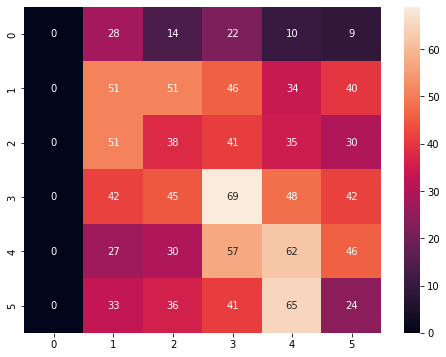

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Speaker, Party, Text Data

In [ ]:
speaker_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/train_speaker.csv')
speaker_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/test_speaker.csv')
speaker_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/valid_speaker.csv')

In [ ]:
party_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/train_party.csv')
party_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/test_party.csv')
party_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/valid_party.csv')

In [ ]:
speaker_vocab_size = max(list(speaker_train['speaker']) + list(speaker_test['speaker']) + list(speaker_valid['speaker']))+1
party_vocab_size = max(list(party_train['party']) + list(party_test['party']) + list(party_valid['party']))+1
text_vocab_size = vocab_size

### LSTM

In [ ]:
speaker_input = Input(shape=(1,))
speaker_features = (Embedding(input_dim=speaker_vocab_size, input_length=1, output_dim=100))(speaker_input)
speaker_features = Dropout(rate=0.2)(speaker_features)
speaker_features = LSTM(units=4)(speaker_features)

party_input = Input(shape=(1,))
party_features = (Embedding(input_dim=party_vocab_size, input_length=1, output_dim=100))(party_input)
party_features = Dropout(rate=0.2)(party_features)
party_features = LSTM(units=4)(party_features)

text_input = Input(shape=(50,))
text_features = (Embedding(input_dim=text_vocab_size, input_length=50, output_dim=100))(text_input)
text_features = Dropout(rate=0.2)(text_features)
text_features = LSTM(units=4)(text_features)

x = Concatenate()([speaker_features, party_features, text_features])
x = Dropout(rate=0.4)(x)
model_output = Dense(units=6, activation='sigmoid')(x)

model = Model([speaker_input, party_input, text_input], model_output, name='model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_59 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_60 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_61 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_63 (Embedding)       (None, 1, 100)       306600      ['input_59[0][0]']               
                                                                                              

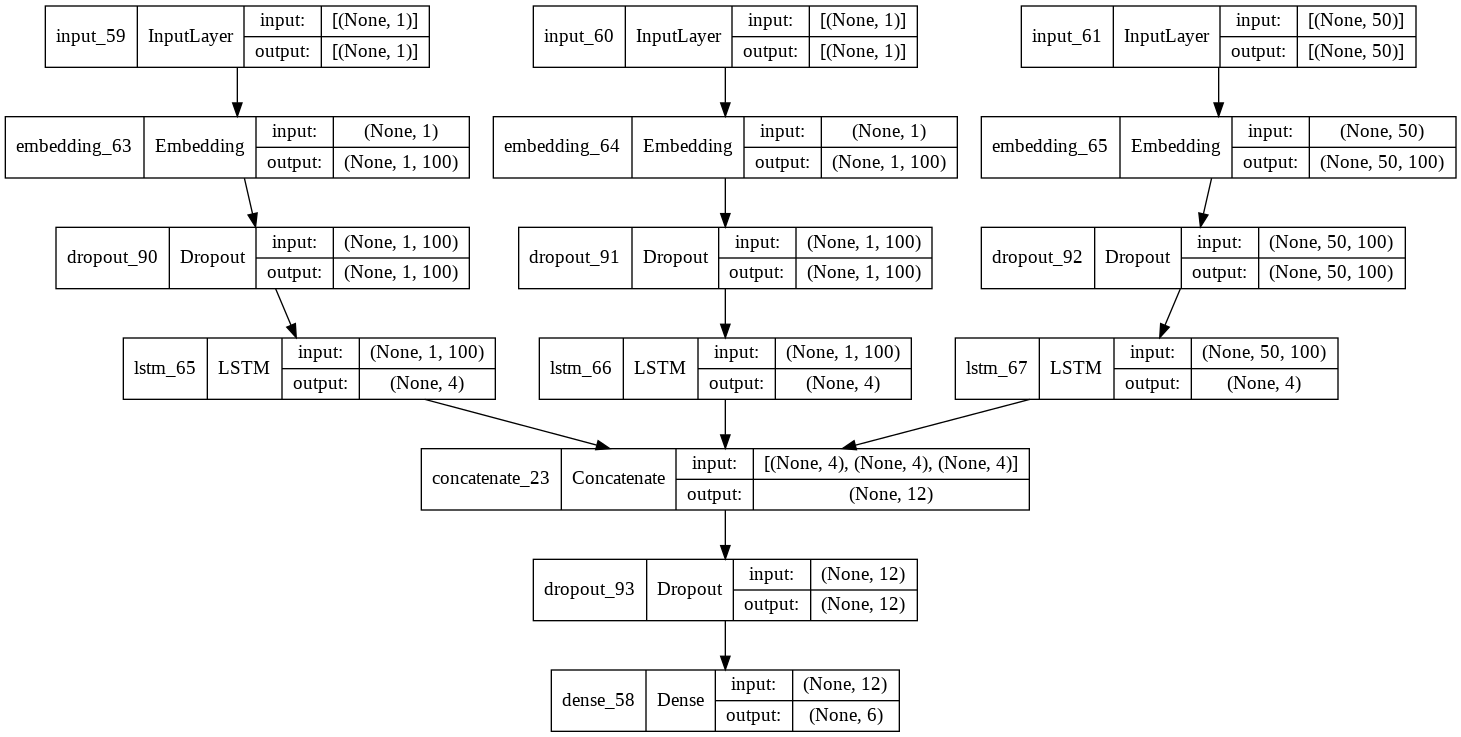

In [ ]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    [speaker_train, party_train, X_train], 
    y_train, 
    validation_data=[[speaker_valid, party_valid, X_valid], y_valid],
    epochs = 5
)

Epoch 1/5
296/296 [==============================] - 21s 52ms/step - loss: 1.7592 - accuracy: 0.2040 - val_loss: 1.7364 - val_accuracy: 0.2477
Epoch 2/5
296/296 [==============================] - 14s 47ms/step - loss: 1.6886 - accuracy: 0.2799 - val_loss: 1.6949 - val_accuracy: 0.2654
Epoch 3/5
296/296 [==============================] - 14s 46ms/step - loss: 1.5544 - accuracy: 0.3707 - val_loss: 1.7079 - val_accuracy: 0.2502
Epoch 4/5
296/296 [==============================] - 14s 46ms/step - loss: 1.3901 - accuracy: 0.4586 - val_loss: 1.7699 - val_accuracy: 0.2443
Epoch 5/5
296/296 [==============================] - 14s 46ms/step - loss: 1.2606 - accuracy: 0.5127 - val_loss: 1.8368 - val_accuracy: 0.2232


In [ ]:
score, acc = model.evaluate([speaker_test, party_test, X_test], y_test)
print('Test score:', score)
print('Test accuracy:', acc)

37/37 [==============================] - 0s 6ms/step - loss: 1.8069 - accuracy: 0.2614
Test score: 1.8069305419921875
Test accuracy: 0.26135390996932983


In [ ]:
y_probas = model.predict([speaker_test, party_test, X_test])
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.32      0.14      0.20        83
           1       0.27      0.28      0.27       222
           2       0.21      0.29      0.24       195
           3       0.24      0.24      0.24       246
           4       0.29      0.28      0.29       222
           5       0.30      0.27      0.28       199

    accuracy                           0.26      1167
   macro avg       0.27      0.25      0.25      1167
weighted avg       0.27      0.26      0.26      1167



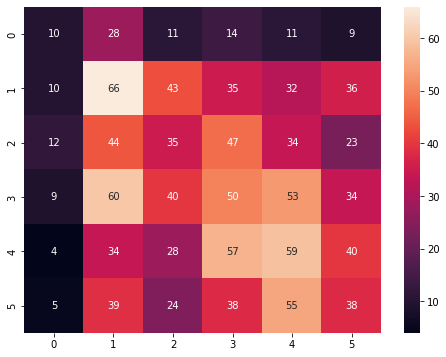

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Bi-LSTM

In [ ]:
speaker_input = Input(shape=(1,))
speaker_features = (Embedding(input_dim=speaker_vocab_size, input_length=1, output_dim=100))(speaker_input)
speaker_features = Dropout(rate=0.2)(speaker_features)
speaker_features = Bidirectional(LSTM(units=4))(speaker_features)

party_input = Input(shape=(1,))
party_features = (Embedding(input_dim=party_vocab_size, input_length=1, output_dim=100))(party_input)
party_features = Dropout(rate=0.2)(party_features)
party_features = Bidirectional(LSTM(units=4))(party_features)

text_input = Input(shape=(50,))
text_features = (Embedding(input_dim=text_vocab_size, input_length=50, output_dim=100))(text_input)
text_features = Dropout(rate=0.2)(text_features)
text_features = Bidirectional(LSTM(units=4))(text_features)

x = Concatenate()([speaker_features, party_features, text_features])
x = Dropout(rate=0.4)(x)
model_output = Dense(units=6, activation='sigmoid')(x)

model = Model([speaker_input, party_input, text_input], model_output, name='model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_57 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_58 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_60 (Embedding)       (None, 1, 100)       306600      ['input_56[0][0]']               
                                                                                              

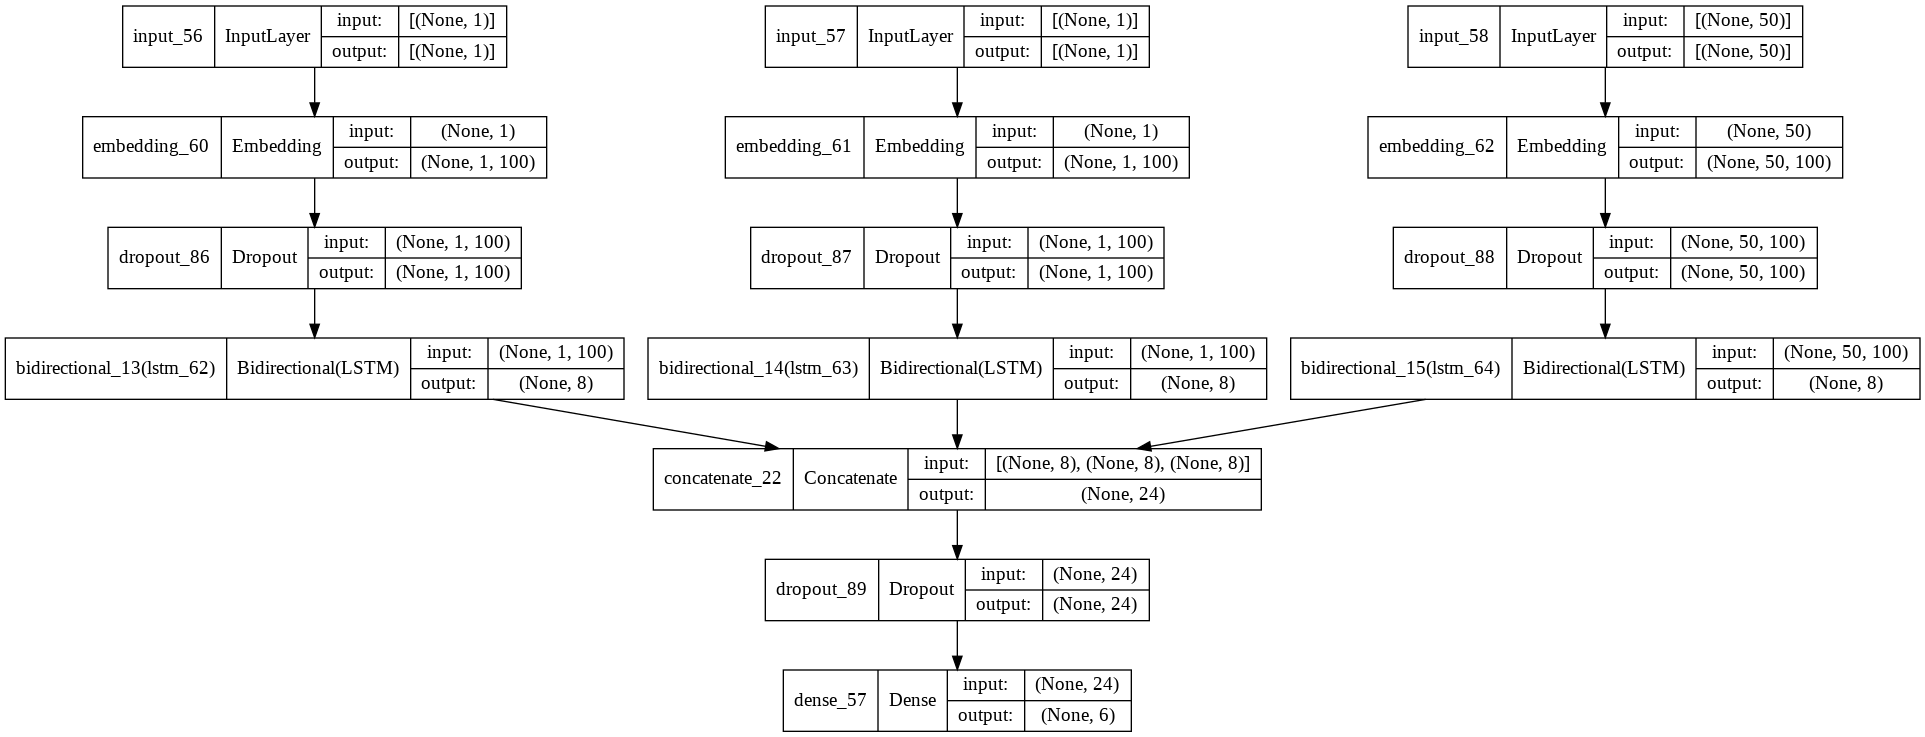

In [ ]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    [speaker_train, party_train, X_train], 
    y_train, 
    validation_data=[[speaker_valid, party_valid, X_valid], y_valid],
    epochs = 5
)

Epoch 1/5
296/296 [==============================] - 32s 71ms/step - loss: 1.7482 - accuracy: 0.2207 - val_loss: 1.7152 - val_accuracy: 0.2697
Epoch 2/5
296/296 [==============================] - 18s 62ms/step - loss: 1.6508 - accuracy: 0.3028 - val_loss: 1.6772 - val_accuracy: 0.2680
Epoch 3/5
296/296 [==============================] - 18s 62ms/step - loss: 1.4912 - accuracy: 0.4093 - val_loss: 1.7119 - val_accuracy: 0.2663
Epoch 4/5
296/296 [==============================] - 18s 62ms/step - loss: 1.3244 - accuracy: 0.4894 - val_loss: 1.7752 - val_accuracy: 0.2688
Epoch 5/5
296/296 [==============================] - 18s 62ms/step - loss: 1.1967 - accuracy: 0.5423 - val_loss: 1.8525 - val_accuracy: 0.2578


In [ ]:
score, acc = model.evaluate([speaker_test, party_test, X_test], y_test)
print('Test score:', score)
print('Test accuracy:', acc)

37/37 [==============================] - 0s 8ms/step - loss: 1.8518 - accuracy: 0.2588
Test score: 1.8518043756484985
Test accuracy: 0.2587831914424896


In [ ]:
y_probas = model.predict([speaker_test, party_test, X_test])
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.48      0.12      0.19        83
           1       0.26      0.41      0.32       222
           2       0.26      0.13      0.17       195
           3       0.24      0.23      0.24       246
           4       0.28      0.31      0.29       222
           5       0.23      0.26      0.24       199

    accuracy                           0.26      1167
   macro avg       0.29      0.24      0.24      1167
weighted avg       0.27      0.26      0.25      1167



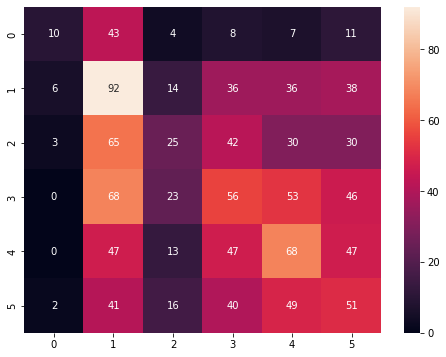

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

# Binary

In [ ]:
binary = dict()
binary[-3] = 0
binary[-2]=0
binary[-1]=0
binary[1]=1
binary[2]=1
binary[3]=1

In [ ]:
y_train = y_train.replace({'label': binary})
y_test = y_test.replace({'label': binary})
y_valid = y_valid.replace({'label': binary})

## Text only

### LSTM

The LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=50, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(LSTM(units=4))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 50, 4)             59828     
                                                                 
 dropout_39 (Dropout)        (None, 50, 4)             0         
                                                                 
 lstm_13 (LSTM)              (None, 4)                 144       
                                                                 
 dropout_40 (Dropout)        (None, 4)                 0         
                                                                 
 dense_26 (Dense)            (None, 100)               500       
                                                                 
 dropout_41 (Dropout)        (None, 100)               0         
                                                                 
 dense_27 (Dense)            (None, 2)               

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
296/296 [==============================] - 9s 23ms/step - loss: 0.6834 - accuracy: 0.5674 - val_loss: 0.6815 - val_accuracy: 0.5511
Epoch 2/10
296/296 [==============================] - 6s 21ms/step - loss: 0.6396 - accuracy: 0.6406 - val_loss: 0.6647 - val_accuracy: 0.5883
Epoch 3/10
296/296 [==============================] - 6s 21ms/step - loss: 0.5541 - accuracy: 0.7320 - val_loss: 0.7095 - val_accuracy: 0.5883
Epoch 4/10
296/296 [==============================] - 6s 21ms/step - loss: 0.4710 - accuracy: 0.7913 - val_loss: 0.7619 - val_accuracy: 0.5917
Epoch 5/10
296/296 [==============================] - 6s 21ms/step - loss: 0.4096 - accuracy: 0.8287 - val_loss: 0.8455 - val_accuracy: 0.5943
Epoch 6/10
296/296 [==============================] - 6s 21ms/step - loss: 0.3635 - accuracy: 0.8498 - val_loss: 0.9066 - val_accuracy: 0.5917
Epoch 7/10
296/296 [==============================] - 6s 21ms/step - loss: 0.3241 - accuracy: 0.8725 - val_loss: 0.9948 - val_accuracy: 0.5968

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      0.49      0.49       500
           1       0.62      0.64      0.63       667

    accuracy                           0.57      1167
   macro avg       0.56      0.56      0.56      1167
weighted avg       0.57      0.57      0.57      1167



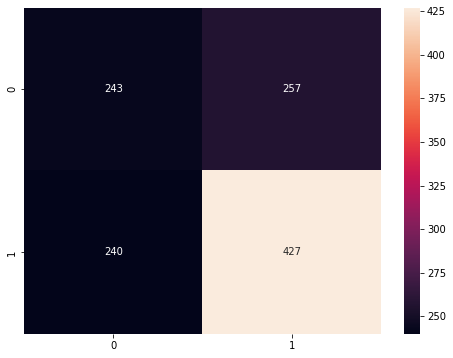

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Bi-LSTM

The Bi-LSTM model includes:
- a layer of embeddings, 
- Dropout(0.2), 
- Bi-LSTM(4), 
- Dropout(0.3), 
- fully connected layer with 100 units and activation function ReLu,
- Dropout(0.4) and fully connected layer with activation function sigmoid. 

Bi-LSTM network was trained on full-text data using the first 1200 words of the articles (because of memory limitations).

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, input_length=50, output_dim=4))
model.add(Dropout(rate=0.2))
model.add(Bidirectional(LSTM(units=4)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=100,  activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_67 (Embedding)    (None, 50, 4)             59828     
                                                                 
 dropout_97 (Dropout)        (None, 50, 4)             0         
                                                                 
 bidirectional_17 (Bidirecti  (None, 8)                288       
 onal)                                                           
                                                                 
 dropout_98 (Dropout)        (None, 8)                 0         
                                                                 
 dense_61 (Dense)            (None, 100)               900       
                                                                 
 dropout_99 (Dropout)        (None, 100)               0         
                                                      

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    validation_data=[X_valid, y_valid],
    epochs = 10
)

Epoch 1/10
296/296 [==============================] - 11s 36ms/step - loss: 0.6847 - accuracy: 0.5671 - val_loss: 0.6929 - val_accuracy: 0.5275
Epoch 2/10
296/296 [==============================] - 10s 32ms/step - loss: 0.6648 - accuracy: 0.5905 - val_loss: 0.6644 - val_accuracy: 0.5934
Epoch 3/10
296/296 [==============================] - 9s 32ms/step - loss: 0.5824 - accuracy: 0.6989 - val_loss: 0.6950 - val_accuracy: 0.5773
Epoch 4/10
296/296 [==============================] - 10s 32ms/step - loss: 0.4780 - accuracy: 0.7832 - val_loss: 0.8066 - val_accuracy: 0.5638
Epoch 5/10
296/296 [==============================] - 9s 32ms/step - loss: 0.3970 - accuracy: 0.8287 - val_loss: 0.8587 - val_accuracy: 0.5562
Epoch 6/10
296/296 [==============================] - 9s 32ms/step - loss: 0.3326 - accuracy: 0.8635 - val_loss: 0.9756 - val_accuracy: 0.5613
Epoch 7/10
296/296 [==============================] - 9s 32ms/step - loss: 0.2912 - accuracy: 0.8834 - val_loss: 1.1075 - val_accuracy: 0.5

In [ ]:
y_probas = model.predict(X_test)
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       500
           1       0.62      0.63      0.62       667

    accuracy                           0.56      1167
   macro avg       0.55      0.55      0.55      1167
weighted avg       0.56      0.56      0.56      1167



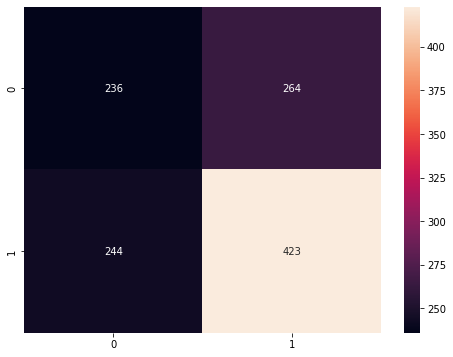

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

## Speaker, Party, Text Data

In [ ]:
speaker_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/train_speaker.csv')
speaker_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/test_speaker.csv')
speaker_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/speaker_data/valid_speaker.csv')

In [ ]:
party_train = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/train_party.csv')
party_test = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/test_party.csv')
party_valid = pd.read_csv('/content/drive/MyDrive/ML_Project/data/liar_dataset/party_data/valid_party.csv')

In [ ]:
speaker_vocab_size = max(list(speaker_train['speaker']) + list(speaker_test['speaker']) + list(speaker_valid['speaker']))+1
party_vocab_size = max(list(party_train['party']) + list(party_test['party']) + list(party_valid['party']))+1
text_vocab_size = vocab_size

### LSTM

In [ ]:
speaker_input = Input(shape=(1,))
speaker_features = (Embedding(input_dim=speaker_vocab_size, input_length=1, output_dim=100))(speaker_input)
speaker_features = Dropout(rate=0.2)(speaker_features)
speaker_features = LSTM(units=4)(speaker_features)

party_input = Input(shape=(1,))
party_features = (Embedding(input_dim=party_vocab_size, input_length=1, output_dim=100))(party_input)
party_features = Dropout(rate=0.2)(party_features)
party_features = LSTM(units=4)(party_features)

text_input = Input(shape=(50,))
text_features = (Embedding(input_dim=text_vocab_size, input_length=50, output_dim=100))(text_input)
text_features = Dropout(rate=0.2)(text_features)
text_features = LSTM(units=4)(text_features)

x = Concatenate()([speaker_features, party_features, text_features])
x = Dropout(rate=0.4)(x)
model_output = Dense(units=2, activation='sigmoid')(x)

model = Model([speaker_input, party_input, text_input], model_output, name='model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_65 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_66 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_67 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_71 (Embedding)       (None, 1, 100)       306600      ['input_65[0][0]']               
                                                                                              

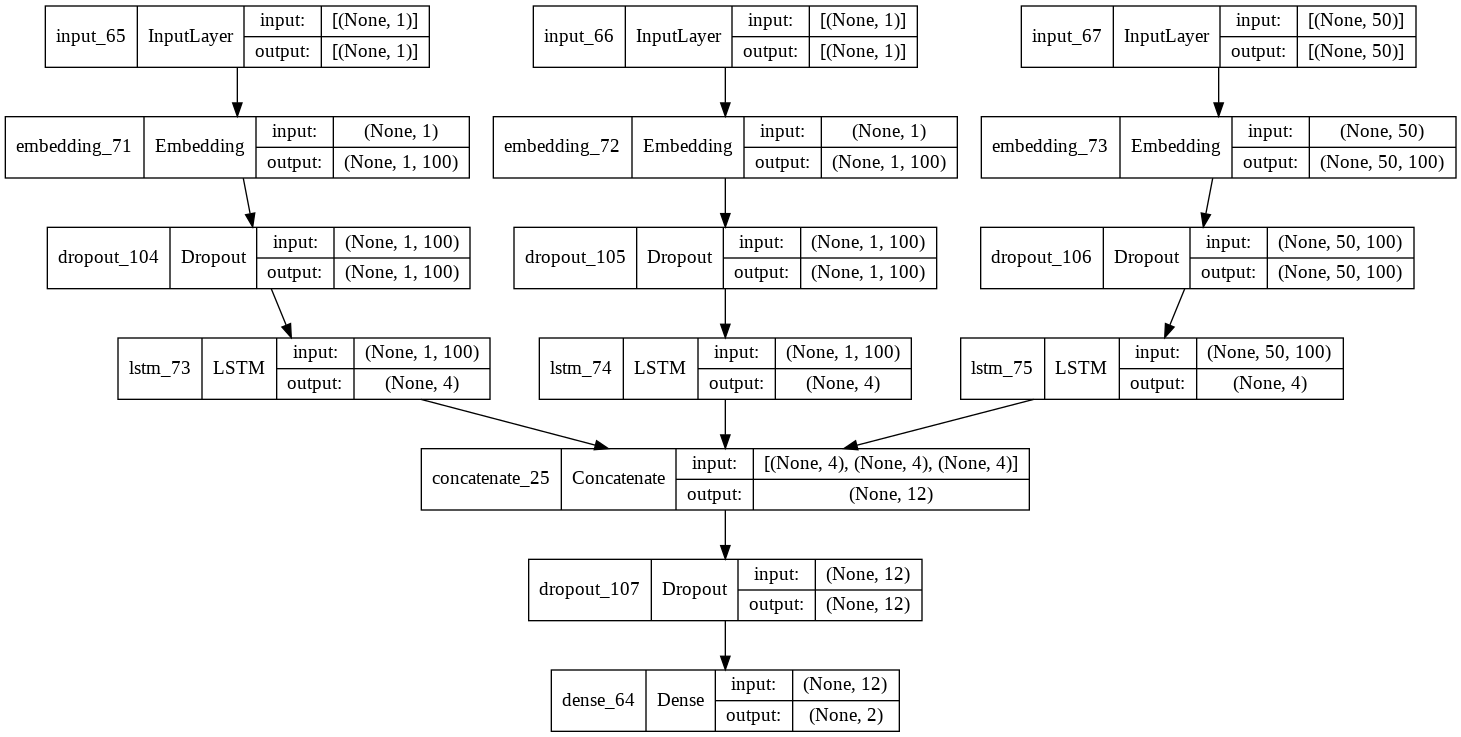

In [ ]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    [speaker_train, party_train, X_train], 
    y_train, 
    validation_data=[[speaker_valid, party_valid, X_valid], y_valid],
    epochs = 10
)

Epoch 1/10
296/296 [==============================] - 21s 52ms/step - loss: 0.6635 - accuracy: 0.6001 - val_loss: 0.6433 - val_accuracy: 0.6272
Epoch 2/10
296/296 [==============================] - 14s 47ms/step - loss: 0.5668 - accuracy: 0.7185 - val_loss: 0.6512 - val_accuracy: 0.6264
Epoch 3/10
296/296 [==============================] - 14s 46ms/step - loss: 0.4400 - accuracy: 0.8025 - val_loss: 0.7204 - val_accuracy: 0.5993
Epoch 4/10
296/296 [==============================] - 14s 47ms/step - loss: 0.3406 - accuracy: 0.8550 - val_loss: 0.8152 - val_accuracy: 0.6036
Epoch 5/10
296/296 [==============================] - 14s 46ms/step - loss: 0.2679 - accuracy: 0.8949 - val_loss: 0.9163 - val_accuracy: 0.5959
Epoch 6/10
296/296 [==============================] - 14s 46ms/step - loss: 0.2102 - accuracy: 0.9202 - val_loss: 1.1040 - val_accuracy: 0.5934
Epoch 7/10
296/296 [==============================] - 14s 47ms/step - loss: 0.1765 - accuracy: 0.9370 - val_loss: 1.2080 - val_accuracy:

In [ ]:
score, acc = model.evaluate([speaker_test, party_test, X_test], y_test)
print('Test score:', score)
print('Test accuracy:', acc)

37/37 [==============================] - 0s 6ms/step - loss: 1.5389 - accuracy: 0.5844
Test score: 1.5388808250427246
Test accuracy: 0.584404468536377


In [ ]:
y_probas = model.predict([speaker_test, party_test, X_test])
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.52      0.48      0.50       500
           1       0.63      0.66      0.64       667

    accuracy                           0.58      1167
   macro avg       0.57      0.57      0.57      1167
weighted avg       0.58      0.58      0.58      1167



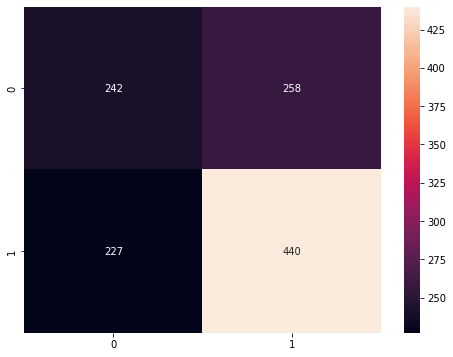

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

### Bi-LSTM

In [ ]:
speaker_input = Input(shape=(1,))
speaker_features = (Embedding(input_dim=speaker_vocab_size, input_length=1, output_dim=100))(speaker_input)
speaker_features = Dropout(rate=0.2)(speaker_features)
speaker_features = Bidirectional(LSTM(units=4))(speaker_features)

party_input = Input(shape=(1,))
party_features = (Embedding(input_dim=party_vocab_size, input_length=1, output_dim=100))(party_input)
party_features = Dropout(rate=0.2)(party_features)
party_features = Bidirectional(LSTM(units=4))(party_features)

text_input = Input(shape=(50,))
text_features = (Embedding(input_dim=text_vocab_size, input_length=50, output_dim=100))(text_input)
text_features = Dropout(rate=0.2)(text_features)
text_features = Bidirectional(LSTM(units=4))(text_features)

x = Concatenate()([speaker_features, party_features, text_features])
x = Dropout(rate=0.4)(x)
model_output = Dense(units=2, activation='softmax')(x)

model = Model([speaker_input, party_input, text_input], model_output, name='model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_68 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_69 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_70 (InputLayer)          [(None, 50)]         0           []                               
                                                                                                  
 embedding_74 (Embedding)       (None, 1, 100)       306600      ['input_68[0][0]']               
                                                                                              

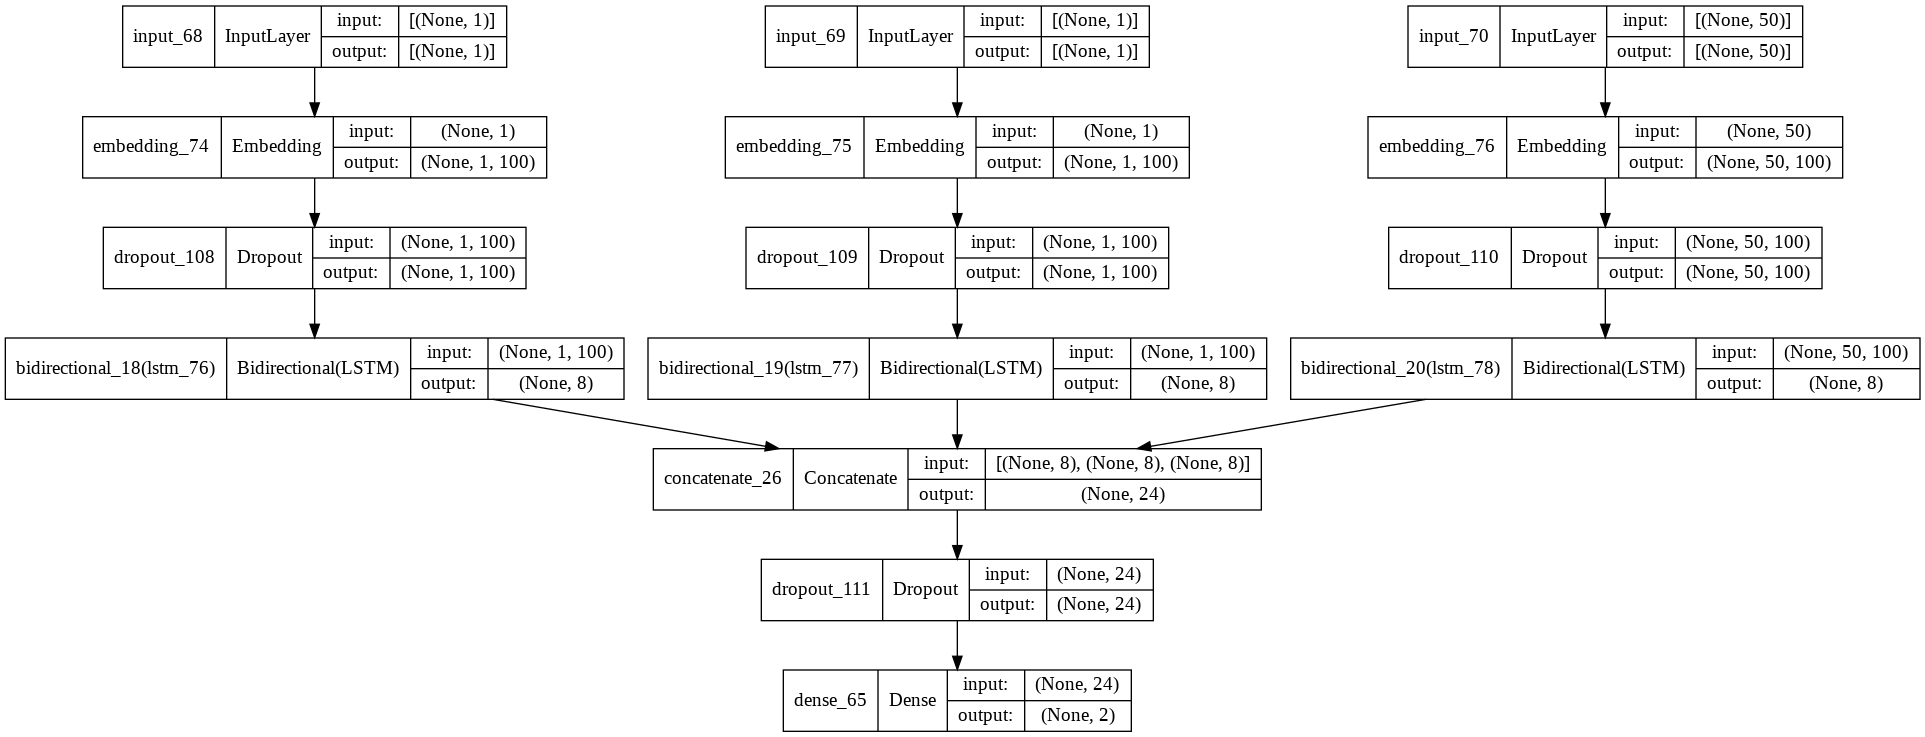

In [ ]:
plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(
    [speaker_train, party_train, X_train], 
    y_train, 
    validation_data=[[speaker_valid, party_valid, X_valid], y_valid],
    epochs = 5
)

Epoch 1/5
296/296 [==============================] - 33s 72ms/step - loss: 0.6638 - accuracy: 0.5967 - val_loss: 0.6385 - val_accuracy: 0.6238
Epoch 2/5
296/296 [==============================] - 18s 62ms/step - loss: 0.5722 - accuracy: 0.7111 - val_loss: 0.6420 - val_accuracy: 0.6171
Epoch 3/5
296/296 [==============================] - 19s 63ms/step - loss: 0.4378 - accuracy: 0.8100 - val_loss: 0.7198 - val_accuracy: 0.6230
Epoch 4/5
296/296 [==============================] - 19s 63ms/step - loss: 0.3278 - accuracy: 0.8620 - val_loss: 0.8054 - val_accuracy: 0.5993
Epoch 5/5
296/296 [==============================] - 19s 63ms/step - loss: 0.2502 - accuracy: 0.8994 - val_loss: 0.9359 - val_accuracy: 0.5993


In [ ]:
score, acc = model.evaluate([speaker_test, party_test, X_test], y_test)
print('Test score:', score)
print('Test accuracy:', acc)

37/37 [==============================] - 0s 9ms/step - loss: 0.9256 - accuracy: 0.6084
Test score: 0.9256069660186768
Test accuracy: 0.6083976030349731


In [ ]:
y_probas = model.predict([speaker_test, party_test, X_test])
y_pred = y_probas.argmax(axis=-1)

In [ ]:
print(classification_report(y_true=y_test, y_pred=y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.55      0.49      0.52       500
           1       0.65      0.69      0.67       667

    accuracy                           0.61      1167
   macro avg       0.60      0.59      0.59      1167
weighted avg       0.60      0.61      0.61      1167



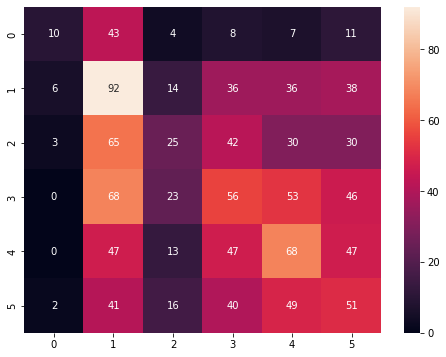

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=[8, 6])
sns.heatmap(cm, annot=True, fmt='d')
plt.show()